<a href="https://colab.research.google.com/github/syedanida/Neural-Network/blob/main/5_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TensorFlow (Low-level, from scratch) - 3-layer neural network.

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Generate synthetic data (non-linear regression problem)
np.random.seed(42)
X = np.random.rand(100, 1).astype(np.float32)  # 100 data points
y = (X**2 + np.random.randn(100, 1) * 0.1).astype(np.float32)  # Quadratic function with noise

In [22]:
# Convert numpy arrays to TensorFlow tensors
X_train = tf.constant(X, dtype=tf.float32)
y_train = tf.constant(y, dtype=tf.float32)

In [23]:
# Define the model from scratch (low-level implementation)

# Initialize weights and biases
W1 = tf.Variable(tf.random.normal([1, 5]))
b1 = tf.Variable(tf.zeros([5]))
W2 = tf.Variable(tf.random.normal([5, 5]))
b2 = tf.Variable(tf.zeros([5]))
W3 = tf.Variable(tf.random.normal([5, 1]))
b3 = tf.Variable(tf.zeros([1]))

In [24]:
# Define the forward pass function
def forward(X):
    # Layer 1: Linear transformation + ReLU activation
    Z1 = tf.matmul(X, W1) + b1
    A1 = tf.nn.relu(Z1)  # ReLU activation

    # Layer 2: Linear transformation + ReLU activation
    Z2 = tf.matmul(A1, W2) + b2
    A2 = tf.nn.relu(Z2)  # ReLU activation

    # Layer 3: Output layer (no activation)
    Z3 = tf.matmul(A2, W3) + b3
    return Z3

In [25]:
# Define the loss function (Mean Squared Error)
def compute_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))  # MSE loss

In [26]:
# Define the backward pass (manual gradient computation)
def backward(X, y, learning_rate=0.01):
    with tf.GradientTape() as tape:
        y_pred = forward(X)  # Ensure we compute forward pass inside the tape
        loss = compute_loss(y_pred, y)

    # Compute gradients
    gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])

    # Update weights and biases using gradient descent
    W1.assign_sub(learning_rate * gradients[0])  # Matches shape [1,5]
    b1.assign_sub(learning_rate * gradients[1])  # Matches shape [5]
    W2.assign_sub(learning_rate * gradients[2])  # Matches shape [5,5]
    b2.assign_sub(learning_rate * gradients[3])  # Matches shape [5]
    W3.assign_sub(learning_rate * gradients[4])  # Matches shape [5,1]
    b3.assign_sub(learning_rate * gradients[5])  # Matches shape [1]

    return loss

In [27]:
# Training Loop
epochs = 1000
losses = []

for epoch in range(epochs):
    loss = backward(X_train, y_train)  # Backprop includes forward pass

    losses.append(loss.numpy())

    if epoch % 100 == 0:  # Print loss every 100 epochs
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

Epoch 0, Loss: 0.7829321026802063
Epoch 100, Loss: 0.08459284156560898
Epoch 200, Loss: 0.0815708190202713
Epoch 300, Loss: 0.07864084094762802
Epoch 400, Loss: 0.07496298104524612
Epoch 500, Loss: 0.07039941102266312
Epoch 600, Loss: 0.06486023217439651
Epoch 700, Loss: 0.0583522766828537
Epoch 800, Loss: 0.05108281597495079
Epoch 900, Loss: 0.04349527508020401


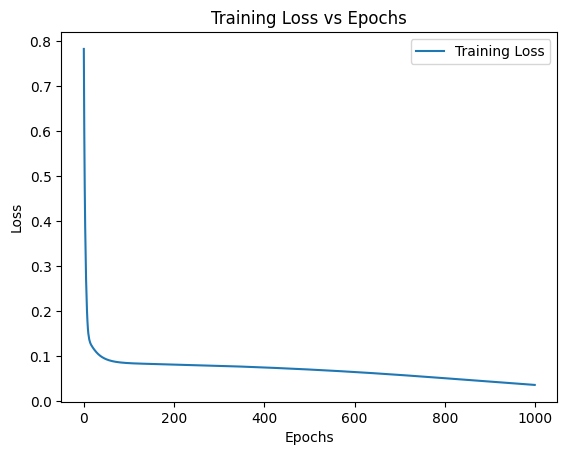

In [28]:
# Plotting the training loss curve
plt.plot(range(epochs), losses, label="Training Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()


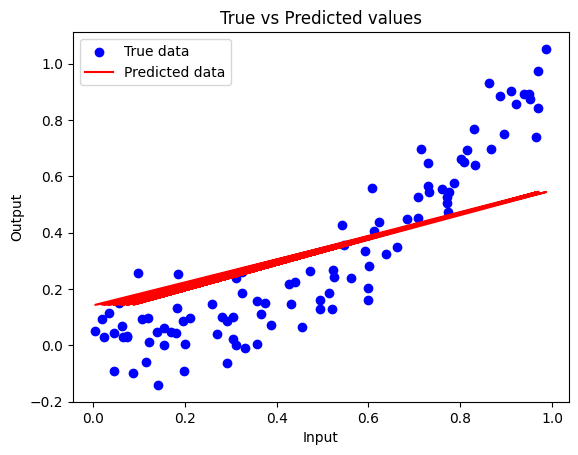

In [29]:
# Plotting the true vs predicted values
y_pred = forward(X_train).numpy()  # Get predictions from the trained model

plt.scatter(X, y, color='blue', label='True data')
plt.plot(X, y_pred, color='red', label='Predicted data')
plt.title('True vs Predicted values')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()